In [1]:
import os
import copy
import datetime
import shutil

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
import scipy as sp
from pydub import AudioSegment

In [2]:
path_audio = 'songs/The National - Fake Empire.mp3'
# load audio file
format = path_audio.split('.')[-1]
format


'mp3'

In [3]:
audio = AudioSegment.from_file(path_audio, format=format)  # audio data
audio

In [4]:
sf = audio.frame_rate  # sampling frequency
sf

44100

In [24]:
# this command returns the raw audio data as an array of (numeric) samples
audio.get_array_of_samples[audio.get_array_of_samples()>0][0:10]

TypeError: '>' not supported between instances of 'array.array' and 'int'

In [ ]:
# convert to mono
audio_data = np.mean(np.array(audio.get_array_of_samples()).reshape((-1, 2)), axis=1)  

# keep he original audio data
audio_data_raw = copy.deepcopy(self.audio_data)

dt = 1.0 / self.sf  # Time step


Default Example

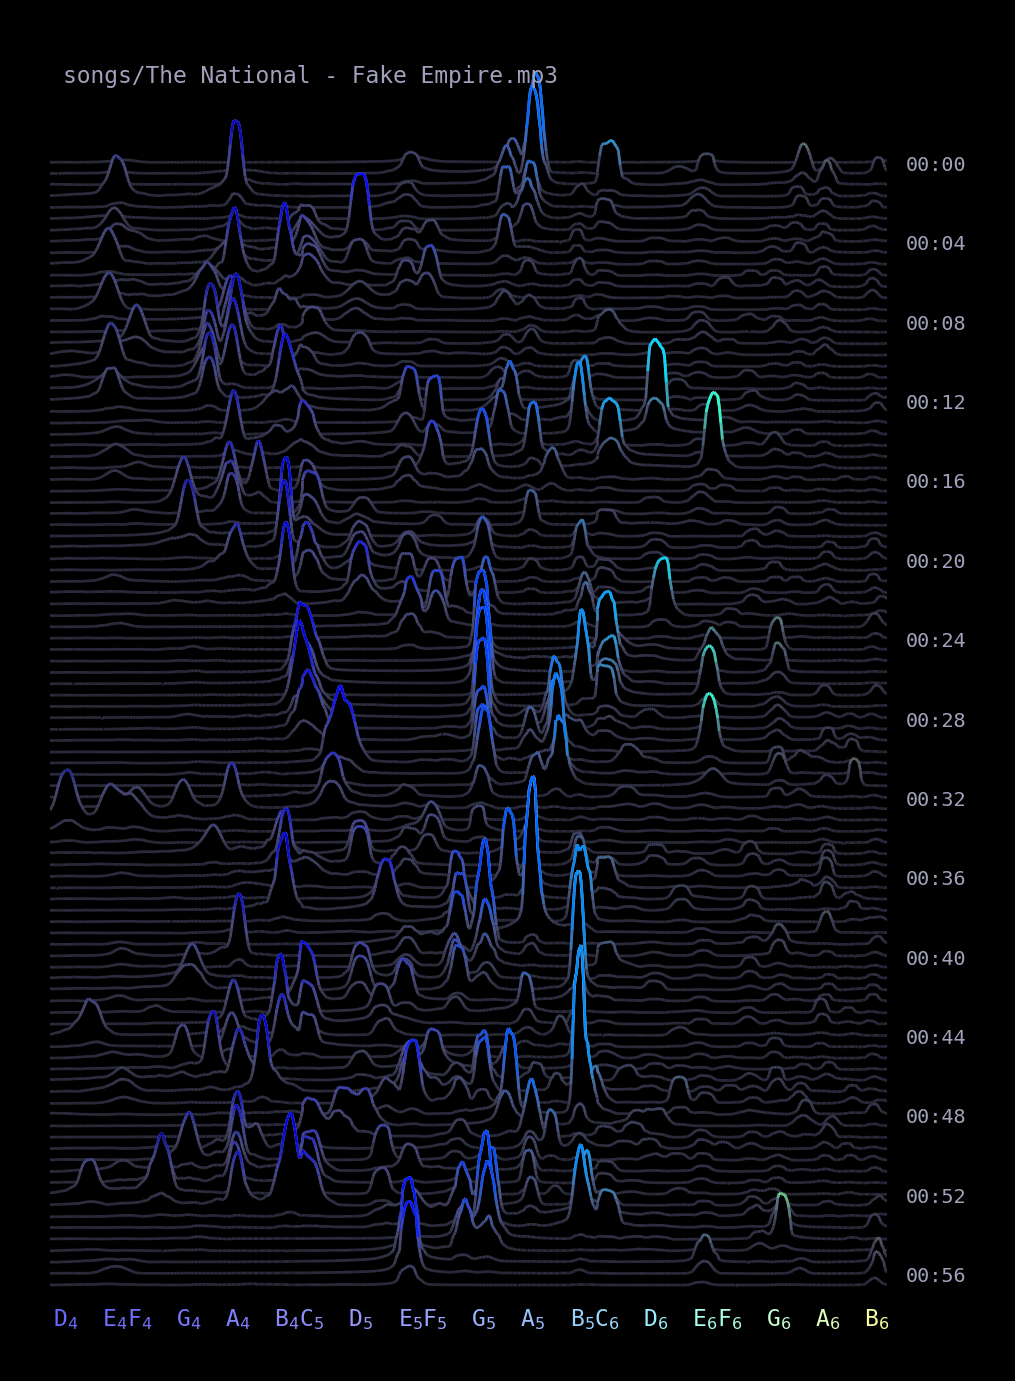

In [9]:
path_audio = 'songs/bach_A_minor.mp3'

Spec = Spectrogram(path_audio)

# Set the frequency range (notes or frequency values)
Spec.set_freq_range('C#4', 'F#7')

# Set the window size of the spectrogram
window_size = 0.5  # seconds
Spec.make_spectrogram(window_size)

Spec.set_title(title='songs/The National - Fake Empire.mp3')

savepath = 'figures/fake_empire.png'
Spec.plot(savepath=savepath, 
          show=True  # defaults to False 
          )

Example changing parameters

In [3]:
path_audio = 'songs/moonlight.mp3'

Spec = Spectrogram(path_audio)

# Set the frequency range (notes or frequency values)
Spec.set_freq_range('A1', 'A#4')

# Set the window size of the spectrogram
window_size = 0.3  # seconds

Spec.make_spectrogram(window_size,
                      frequency_resolution=200, # x-axis resolution
                      moving_average=10  # size of rolling mean window
                      )

Spec.set_plot_params(
                     fig_size=1920,
                     ratio=16/9, # desired ratio
                     scale=0.8,  # scale the plot on y axis
                     number_lines=100,  # number of horizontal lines
                     facecolor='#242424', 
                     cmap1=('binary', 0.5, 0.8),  # base colormap and range
                     cmap2=('cool', 0, 1),   # colormap for notes
                     linewidth=0.055,
                     y_max=1.1,  # adjust for top padding
                     color_spectra_power=2,  # higher for more spectral color (cmap2)
                     )

Spec.set_title(title='Moonlight Sonata - L. van Beethoven', 
               modify='l0.5',  # l stands for lightening the color, 0.5 for the amount. Also possible with d for darkening color.
               position=(0.015, 0.98))

Spec.set_xticks(label_size=1.1, 
                modify='l0.5', 
                key='E_major',  # key of the song
                label_pad=1.2)

Spec.set_yticks(modify='l0.5',
                jump=5)

savepath = 'figures/moonlight.png'
Spec.plot(savepath=savepath)

Make a nice video of the spectrogram being generated as music plays along

In [ ]:
savefold = f'figures/moonlight/frames/'

# Generates the frames
Spec.generate_frames(savefolder=savefold)

# Generates the video with the frames
Spec.frames_to_video(
    audio_delay=10  # in ms
)